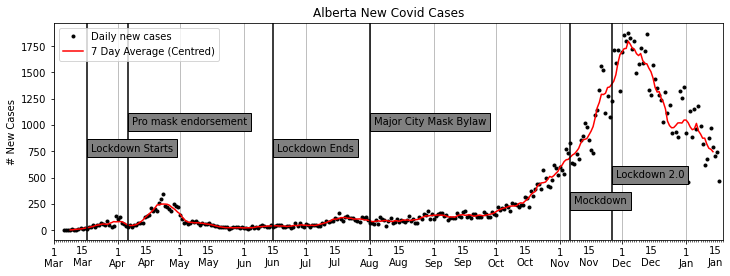

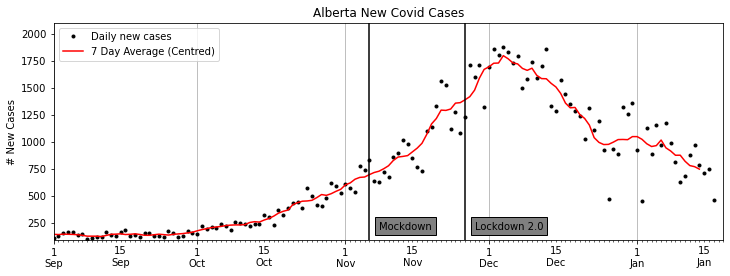

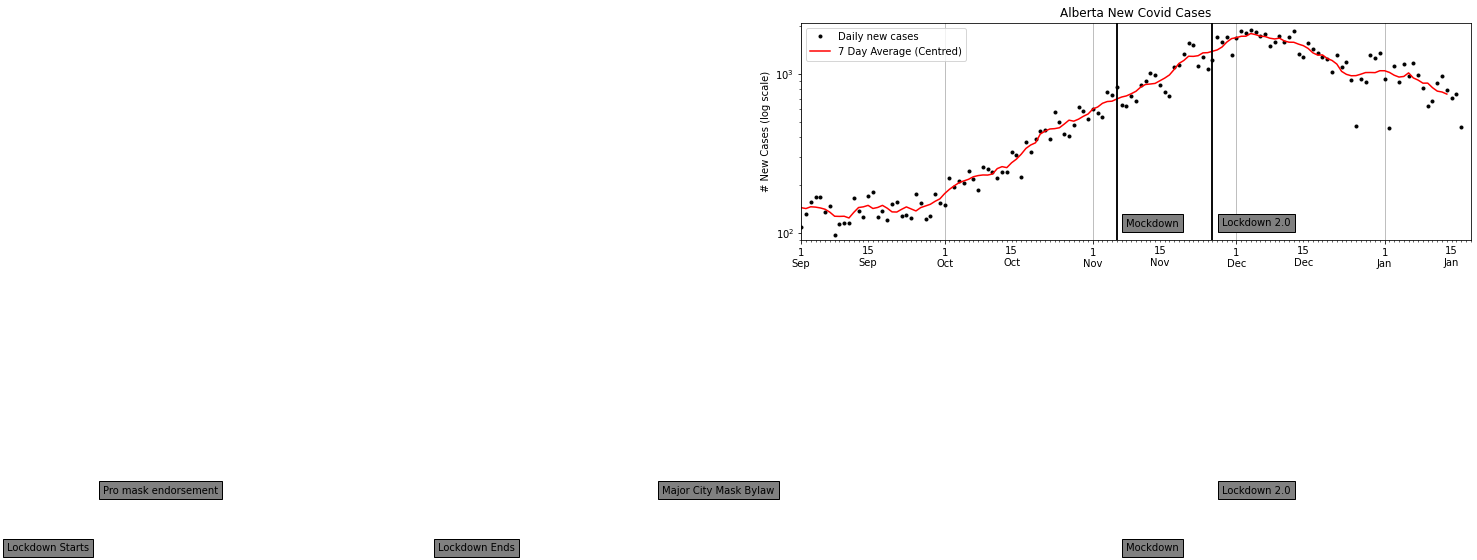

In [2]:
import csv
import pandas as pd

import datetime
from datetime import timedelta
import matplotlib.ticker as ticker

from IPython.display import display, HTML

import matplotlib.pyplot as plt
import matplotlib
Important_Dates={datetime.datetime(2020, 3, 17):"Lockdown Starts",
                 datetime.datetime(2020, 4, 6):"Pro mask endorsement",
                 datetime.datetime(2020, 6, 15):"Lockdown Ends",
                 datetime.datetime(2020,8,1):"Major City Mask Bylaw",
                datetime.datetime(2020,11,6):"Mockdown",
                datetime.datetime(2020,11,26):"Lockdown 2.0"}


csv.reader("covid19dataexport.cvs")
def test_func(x,pos):
    date=matplotlib.dates.num2date(x)
    if date.day==1:
        label='1\n'+date.strftime("%b")
    elif date.day==15:
        label='15\n'+date.strftime("%b")
    else:
        label=""
    return label

data=[]

with open('covid19dataexport.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        data.append(row)

        
raw_df = pd.read_csv('covid19dataexport.csv')
for col in raw_df.columns: 

    if col != "Date reported":
        raw_df=raw_df.drop(col,axis=1)
        
raw_df['Date'] = pd.to_datetime(raw_df["Date reported"])

raw_df['count'] = raw_df.groupby('Date')['Date'].transform('count').reindex()
raw_df=raw_df.drop_duplicates()

raw_df=raw_df.drop("Date reported",axis=1)
idx = pd.date_range(raw_df.Date.min(), raw_df.Date.max(), freq='D')
raw_df=raw_df.reset_index()


df = raw_df.set_index("Date").drop("index",axis=1)

df = df.reindex(idx).fillna(0)
#Bin size in days
n=7
#n=3
df2 = (df.rolling(window=n, center=True,min_periods=n).mean()
       )

df2=df2.rename(columns={"count":"{} Day Average (Centred)".format(n)})


#df = pd.concat([df, df2], axis=1)
df = pd.merge(df, df2, left_index=True, right_index=True, how='outer')
df=df.rename(columns={"count":"Daily new cases".format(n)})

P1=df.plot(figsize=(12,4),style=['.','-'],color=['k','r'])
P1.set_title("Alberta New Covid Cases")
P1.set_ylabel("# New Cases")

plt.legend(loc='upper left')
counter=0
for date,label in Important_Dates.items():
    plt.axvline(x=date,label=label,color='k')
    
    plt.text(date+timedelta(days=2) ,-(counter//4)*500+(counter%2)*250+750,label,
            bbox=dict(facecolor='grey', alpha=1))
    counter+=1
P1.set_xlim((datetime.datetime(2020,3,1),datetime.date.today()))
plt.grid(b=True, which='major', axis='x')

P1.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
P1.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
P1.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(test_func))
P1.xaxis.set_major_formatter(test_func)


plt.savefig('fig1.jpg',facecolor='w', transparent=False,dpi=300)


P1=df.plot(figsize=(12,4),style=['.','-'],color=['k','r'])
P1.set_title("Alberta New Covid Cases")
P1.set_ylabel("# New Cases")

plt.legend(loc='upper left')
P1.set_xlim((datetime.datetime(2020,9,1),datetime.date.today()))
P1.set_ylim((90,2100))
for date,label in Important_Dates.items():
    if date>datetime.datetime(2020,9,1):
        plt.axvline(x=date,label=label,color='k')
        plt.text(date+timedelta(days=2) ,(counter%2)*1.2+190,label,
                bbox=dict(facecolor='grey', alpha=1))
        counter+=1
plt.grid(b=True, which='major', axis='x')

P1.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
P1.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
P1.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(
    test_func))
P1.xaxis.set_major_formatter(test_func)

plt.savefig('fig1_zoom.jpg',facecolor='w', transparent=False,dpi=300)



P2=df.plot(figsize=(12,4),style=['.','-'],color=['k','r'],logy=True)
P2.set_title("Alberta New Covid Cases")
P2.set_ylabel("# New Cases (log scale)")
plt.legend(loc='upper left')

counter=0
for date,label in Important_Dates.items():
    plt.axvline(x=date,label=label,color='k')
    plt.text(date+timedelta(days=2) ,(counter%2)*1.3+1,label,
            bbox=dict(facecolor='grey', alpha=1))
    counter+=1
    
plt.grid(b=True, which='major', axis='x')

P2.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
P2.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
P2.xaxis.set_major_formatter(test_func)
P2.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(test_func)) 
plt.savefig('fig2.jpg',facecolor='w', transparent=False,dpi=300)

P2.set_xlim((datetime.datetime(2020,9,1),datetime.date.today()))
P2.set_ylim((90,2100))
for date,label in Important_Dates.items():
    if date>datetime.datetime(2020,9,1):
        plt.axvline(x=date,label=label,color='k')
        plt.text(date+timedelta(days=2) ,(counter%2)*1.2+110,label,
                bbox=dict(facecolor='grey', alpha=1))
        counter+=1
plt.grid(b=True, which='major', axis='x')

P2.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
P2.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
P2.xaxis.set_major_formatter(test_func)
P2.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(test_func))
plt.savefig('fig2_zoom.jpg',facecolor='w', transparent=False,dpi=300)




'Nov'

In [42]:
dir(P1.xaxis)

['OFFSETTEXTPAD',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alpha',
 '_animated',
 '_autolabelpos',
 '_axes',
 '_clipon',
 '_clippath',
 '_contains',
 '_copy_tick_props',
 '_default_contains',
 '_format_with_dict',
 '_get_clipping_extent_bbox',
 '_get_tick',
 '_get_tick_bboxes',
 '_get_tick_boxes_siblings',
 '_get_tick_label_size',
 '_get_ticks_position',
 '_gid',
 '_gridOnMajor',
 '_gridOnMinor',
 '_in_layout',
 '_label',
 '_major_tick_kw',
 '_minor_tick_kw',
 '_mouseover',
 '_oid',
 '_path_effects',
 '_picker',
 '_propobservers',
 '_rasterized',
 '_remove_method',
 '_remove_overlapping_locs',
 '_scale',
 '_set_art

In [108]:
P1_fig

TypeError: __init__() takes 2 positional arguments but 3 were given

<Figure size 864x288 with 1 Axes>

C:\Users\RJVes\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


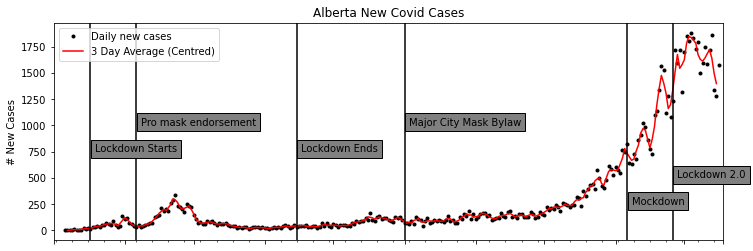

In [67]:
P1.set_xticklabels([""]*10)


In [115]:
P1.set_xmajorticklabels=[]
P1.set_xminorticklabels=[]

In [116]:
P1_fig

TypeError: __init__() takes 2 positional arguments but 3 were given

<Figure size 864x288 with 1 Axes>

In [97]:
dir(P1.xaxis.set_major_formatter)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [92]:
P1.get_xmajorticklabels()

C:\Users\RJVes\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


[Text(18322.0, 0, ''),
 Text(18353.0, 0, 'Mar-03'),
 Text(18383.0, 0, 'Mar-04'),
 Text(18414.0, 0, 'Mar-05'),
 Text(18444.0, 0, 'Mar-06'),
 Text(18475.0, 0, 'Mar-07'),
 Text(18506.0, 0, 'Mar-08'),
 Text(18536.0, 0, 'Mar-09'),
 Text(18567.0, 0, 'Mar-10'),
 Text(18597.0, 0, 'Mar-11')]

In [107]:
P1.get_xticks()

array([18322., 18353., 18383., 18414., 18444., 18475., 18506., 18536.,
       18567., 18597.])

In [103]:
dir(matplotlib.ticker.FixedFormatter)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_set_locator',
 'axis',
 'create_dummy_axis',
 'fix_minus',
 'format_data',
 'format_data_short',
 'format_ticks',
 'get_offset',
 'locs',
 'set_axis',
 'set_bounds',
 'set_data_interval',
 'set_locs',
 'set_offset_string',
 'set_view_interval']